# Week#6
## Кластеризация и вызуализация
### Уменьшение количества цветов изображения

Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.

Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.

Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.

Алгоритм KMeans реализован в классе sklearn.cluster.KMeans. Так как это один из примеров unsupervised-задачи, для обучения достаточно передать только матрицу объектов.

В качестве метрики будем использовать PSNR — адаптация метрики MSE для задачи нахождениях сходства изображений.

Для работы с изображениями мы рекомендуем воспользоваться пакетом scikit-image. Чтобы загрузить изображение, необходимо выполнить следующую команду:

from skimage.io import imread

image = imread('parrots_4.jpg')


После этих действий переменная image будет содержать изображение в виде numpy-массива размера n * m * 3, где n и m соответствуют размерам изображения, а 3 соответствует формату представления RGB.

Если вы хотите вывести изображение на экран, необходимо, чтобы у вас была установлена библиотека matplotlib. С помощью нее это делается следующим образом:

import pylab

pylab.imshow(image)

Если вы работаете в ipython-notebook'е, то вам необходимо перед выполнением кода выше исполнить в любой ячейке инструкцию:

%matplotlib inline

Она позволяет выводить изображения прямо в ipython-notebook.

In [83]:
import math
import numpy as np
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
import pylab
%matplotlib inline

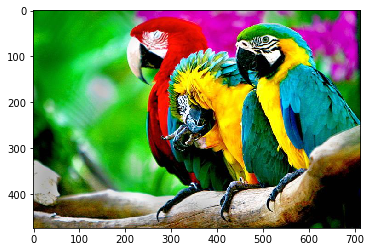

In [96]:
# Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения 
# в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля 
# skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы 
# получите некорректный результат.
img = imread(fname='data/parrots.jpg')
img = img_as_float(img)
pylab.imshow(img)

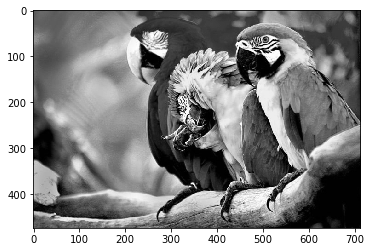

In [97]:
pylab.imshow(rgb2gray(img), cmap='gray')

(19.819876856223097, 19.553466974548762)

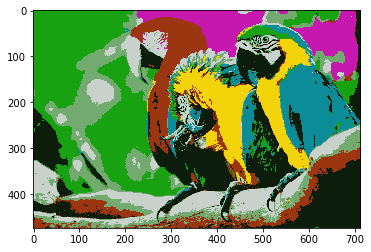

In [104]:
# Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - 
# значениями интенсивности в пространстве RGB.
# Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 
# После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить 
# двумя способами: медианным и средним цветом по кластеру.
# Измерьте качество получившейся сегментации с помощью метрики PSNR. 
# Эту метрику нужно реализовать самостоятельно 
# (см. определение: https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio).

def get_psnr(S, N):
    S = rgb2gray(S)
    N = rgb2gray(N)
    
    assert(S.shape[0] == N.shape[0])
    assert(S.shape[1] == N.shape[1])
    
    m, n = S.shape[0], S.shape[1]
    
    mse = 0
    maxv = 0
    for i in range(m):
        for j in range(n):
            mse += (S[i][j] - N[i][j])**2
            if maxv < S[i][j]: maxv = S[i][j]
    mse /= m*n 
    assert(mse > 0)
    #print mse, maxv
    return 20 * math.log10(maxv) - 10 * math.log10(mse)

def solve(img, n_clusters):
    assert(img.shape[2] == 3)

    m, n = img.shape[0], img.shape[1]

    img_X = img.reshape((m*n, 3))

    method = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    method.fit(img_X)

    means = [np.mean([img_X[method.labels_ == i, :]], axis=1) for i in range(method.n_clusters)]
    medians = [np.median([img_X[method.labels_ == i]], axis=1) for i in range(method.n_clusters)]

    #print means
    #print medians    

    img_mean = np.array([means[method.labels_[i]] for i in range(m*n)])[:,0,:].reshape(img.shape)
    img_median = np.array([medians[method.labels_[i]] for i in range(m*n)])[:,0,:].reshape(img.shape)

    #print img_mean
    #print img_median

    pylab.imshow(img_mean)
    #pylab.imshow(img_median)
    
    return get_psnr(img, img_mean), get_psnr(img, img_median)

solve(img, 8)

0.06836641004 1.0
0.0684036784552 1.0
n_clusters: 1 psnr_mean: 11.6515722456, psnr_median: 11.6492054317
0.0458830615039 1.0
0.0499072489102 1.0
n_clusters: 2 psnr_mean: 13.3834761192, psnr_median: 13.0183636955
0.0468508122762 1.0
0.0498599689653 1.0
n_clusters: 3 psnr_mean: 13.2928287513, psnr_median: 13.0224799615
0.0320370739924 1.0
0.0349814772781 1.0
n_clusters: 4 psnr_mean: 14.9434715573, psnr_median: 14.5616185409
0.0129011818261 1.0
0.0142766634603 1.0
n_clusters: 5 psnr_mean: 18.8937050388, psnr_median: 18.4537327786
0.0130576081938 1.0
0.0137029075894 1.0
n_clusters: 6 psnr_mean: 18.8413636696, psnr_median: 18.6318727109
0.0120179164036 1.0
0.0126883079694 1.0
n_clusters: 7 psnr_mean: 19.2017082126, psnr_median: 18.9659628874
0.0104234698462 1.0
0.0110828971391 1.0
n_clusters: 8 psnr_mean: 19.8198768562, psnr_median: 19.5534669745
0.00914519449716 1.0
0.00989368130126 1.0
n_clusters: 9 psnr_mean: 20.3880705365, psnr_median: 20.0464208339
<-- answer


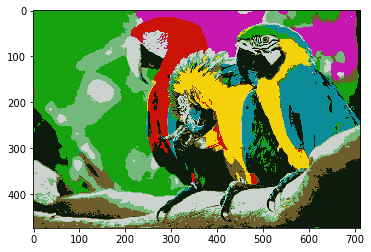

In [103]:
# Найдите минимальное количество кластеров, при котором значение PSNR выше 20 
# (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа 
# заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.
for n in range(1, 21):
    psnr_mean, psnr_median = solve(img, n)
    print 'n_clusters: {} psnr_mean: {}, psnr_median: {}'.format(n, psnr_mean, psnr_median)
    if psnr_mean > 20 or psnr_median > 20: 
        print '<-- answer'
        break